https://blog.naver.com/h0609zxc

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sampleSubmission.csv', 'test.csv']


# columns Description
- datetime - 시간, 연월일시분초 정보가 들어있는 컬럼.
- season - 계절 (봄, 여름, 가을, 겨울)
- holiday - 공휴일 (0: 공휴일X, 1: 공휴일)
- workingday - 근무일 (0: 근무일X, 1: 근무일)
- weather - 날씨 (1: 맑음, 2: 안개/구름, 3: 약한 눈/비/천둥, 4: 강한 눈/비/우박
- temp - 온도
- atemp - 체감 온도
- humidity - 습도
- windspeed - 풍속
- casual - 비회원의 자전거 대여량.
- registered - 회원의 자전거 대여량.
- count - 총 자전거 대여랑, casual + registered

In [2]:
train = pd.read_csv('../input/train.csv', parse_dates=['datetime']) #datetime column -> datetype으로 parsing해서 불러올 것
test = pd.read_csv('../input/test.csv', parse_dates=['datetime'])

In [3]:
print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (10886, 12)
test shape :  (6493, 9)


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.6 KB


# EDA

## casual, registered, count
3개의 칼럼 모두 train 데이터에만 존재하는 칼럼이다. count 는 정확히 casual + registered이다.
나는 당연히 causl, registered를 지우고 시작해야 한다고 생각했다. 근데, 이 저자는 특성을 반영하기 위해 casual과 registered에 대한 예측을 한 후 더한다고 한다.. 아직 뭔가 미심쩍지만, 진행해보겠다.
데이터의 정보를 함부로 지우고 시작하는 것은 지양해야한다.

In [8]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

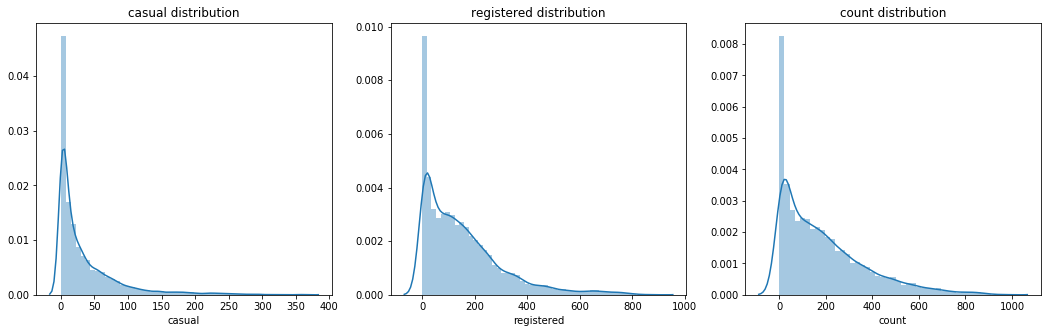

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

sns.distplot(train['casual'], ax = ax[0])
ax[0].set_title('casual distribution')

sns.distplot(train['registered'], ax = ax[1])
ax[1].set_title('registered distribution')

sns.distplot(train['count'], ax = ax[2])
ax[2].set_title('count distribution')

plt.show()

세 가지 모두 분포가 비슷해보인다. 대부분 0일 때가 가장 많다.
그러나 skewed to right이므로, log!

In [10]:
train['casual_log'] = np.log1p(train['casual'] + 1)
train['registered_log'] = np.log1p(train['registered'] + 1)
train['count_log'] = np.log1p(train['count'] + 1)

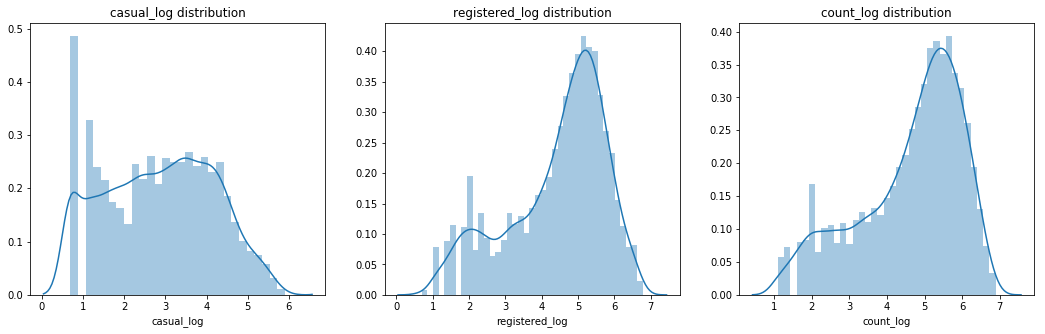

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

sns.distplot(train['casual_log'], ax = ax[0])
ax[0].set_title('casual_log distribution')

sns.distplot(train['registered_log'], ax = ax[1])
ax[1].set_title('registered_log distribution')

sns.distplot(train['count_log'], ax = ax[2])
ax[2].set_title('count_log distribution')

plt.show()

## datetime

In [12]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train['dayofweek'] = train['datetime'].dt.dayofweek #0 : Monday ~ 6 : Sunday

train.iloc[:,[0, 12,13,14,15,16,17,18]].head(3)

,datetime,casual_log,registered_log,count_log,year,month,day,hour
0,2011-01-01 00:00:00,1.609438,2.708050,2.890372,2011,1,1,0
1,2011-01-01 01:00:00,2.302585,3.526361,3.737670,2011,1,1,1
2,2011-01-01 02:00:00,1.945910,3.367296,3.526361,2011,1,1,2


In [13]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

test['dayofweek'] = test['datetime'].dt.dayofweek #0 : Monday ~ 6 : Sunday

test.iloc[:,[0, 9,10,11,12,13,14,15]].head(3)

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3


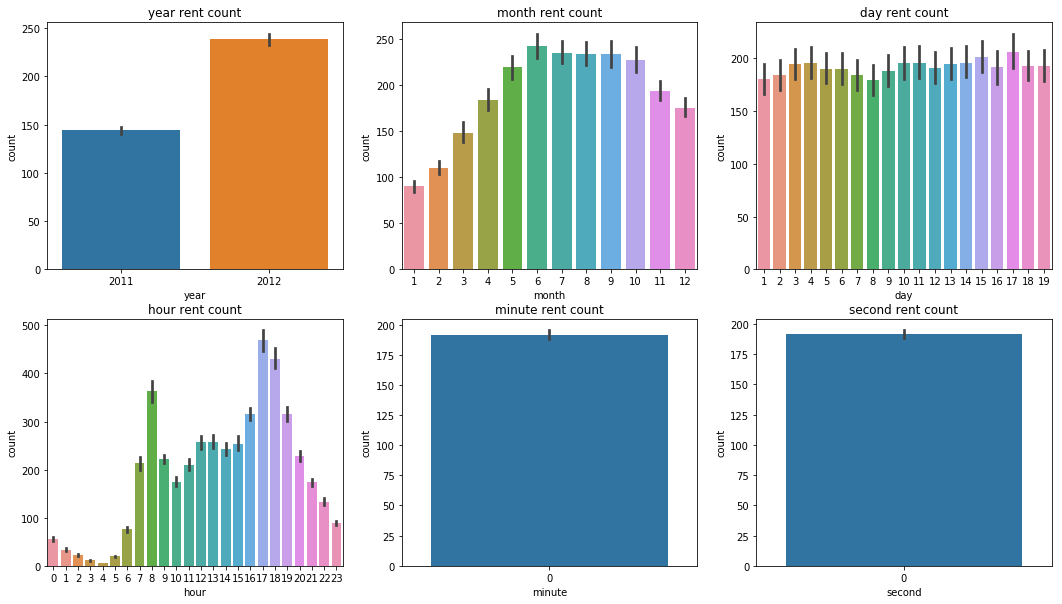

In [14]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,10))

cols = ['year', 'month', 'day', 'hour', 'minute','second']

for i, col in enumerate(cols) :
    sns.barplot(data = train, x = col,  y = 'count', ax = ax[i//3][i%3])
    title = col + ' rent count'
    ax[i//3][i%3].set_title(title)
    
plt.show()

- day : 1~19 : train / 20~ : test
- miniute, second : 모든 값이 0

위 세가지 feature는 빼겠다

## year

In [15]:
plt.style.use('bmh')
%matplotlib inline

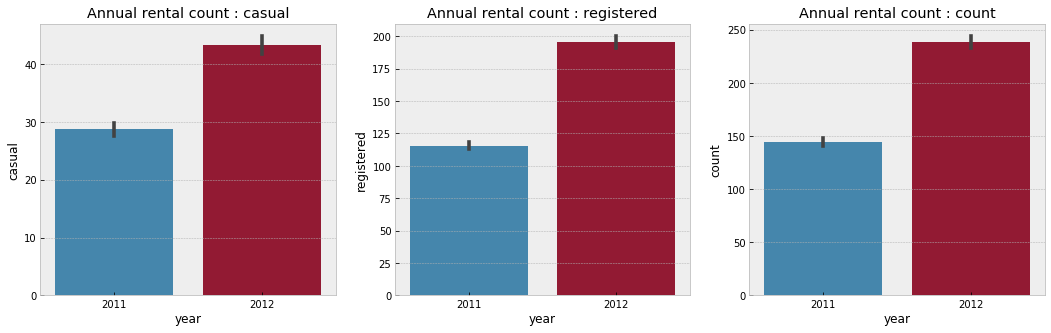

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.barplot(x = 'year', y = col, data = train, ax=ax[i])
    title = 'Annual rental count : ' + col
    ax[i].set_title(title)

casual, registered 모두 2011년 대비 2012년에 횟수가 많다.
자전거 대여 사업이 성장했다!

## month

Text(0.5, 1.0, 'Monthly atemp')

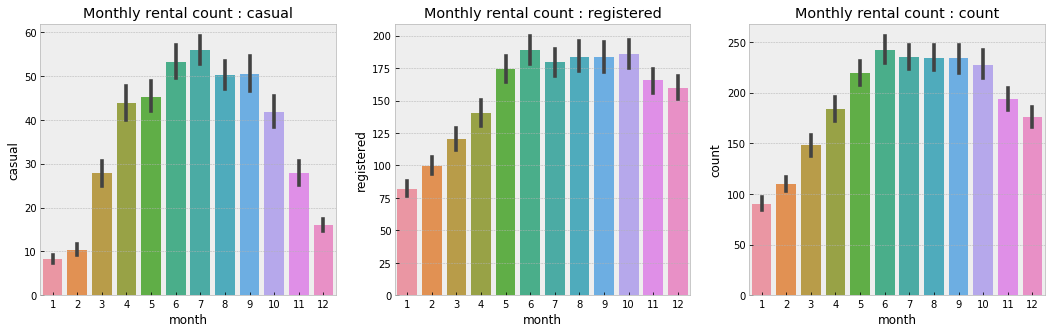

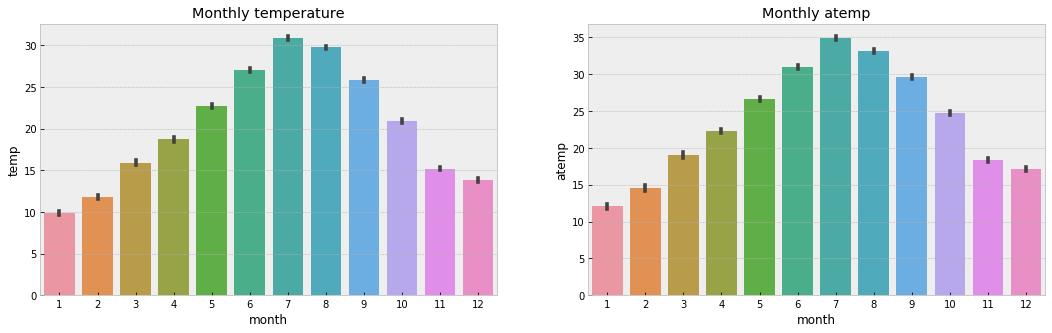

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))
cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.barplot(x = 'month', y = col, data = train, ax=ax[i])
    title = 'Monthly rental count : ' + col
    ax[i].set_title(title)
    

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(18,5))
sns.barplot(x = 'month', y = 'temp', data = train, ax = ax[0])
ax[0].set_title('Monthly temperature')
sns.barplot(x = 'month', y = 'atemp', data = train, ax = ax[1])
ax[1].set_title('Monthly atemp')

- month - count를 보았을 때, 1~2월 빌리는 사람이 적다! -> 추워서?
- month - temperature, atemp 그려봄! -> 1월과 12월의 온도 차가 크지 않다
- 근데 12월에 count가 훨씬 상승할까?


## year - month

In [18]:
train['year-month'] = train['year'].astype('str') + '-' + train['month'].astype('str')
train['year-month'].head(3)

0    2011-1
1    2011-1
2    2011-1
Name: year-month, dtype: object

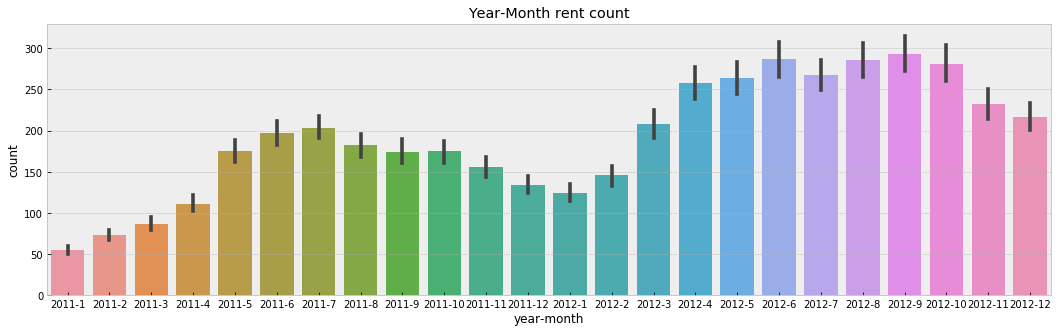

In [19]:
plt.figure(figsize = (18,5))
sns.barplot(data = train, x = 'year-month', y = 'count').set_title('Year-Month rent count')
plt.show()

- 1월부터 12월까지 2011년, 2012년 년 단위로 살펴보았을 때, 그 경향성은 비슷하다
- 12월에 많이 빌린 것이 그냥 업체의 성장 때문인 것 같다!

## hour

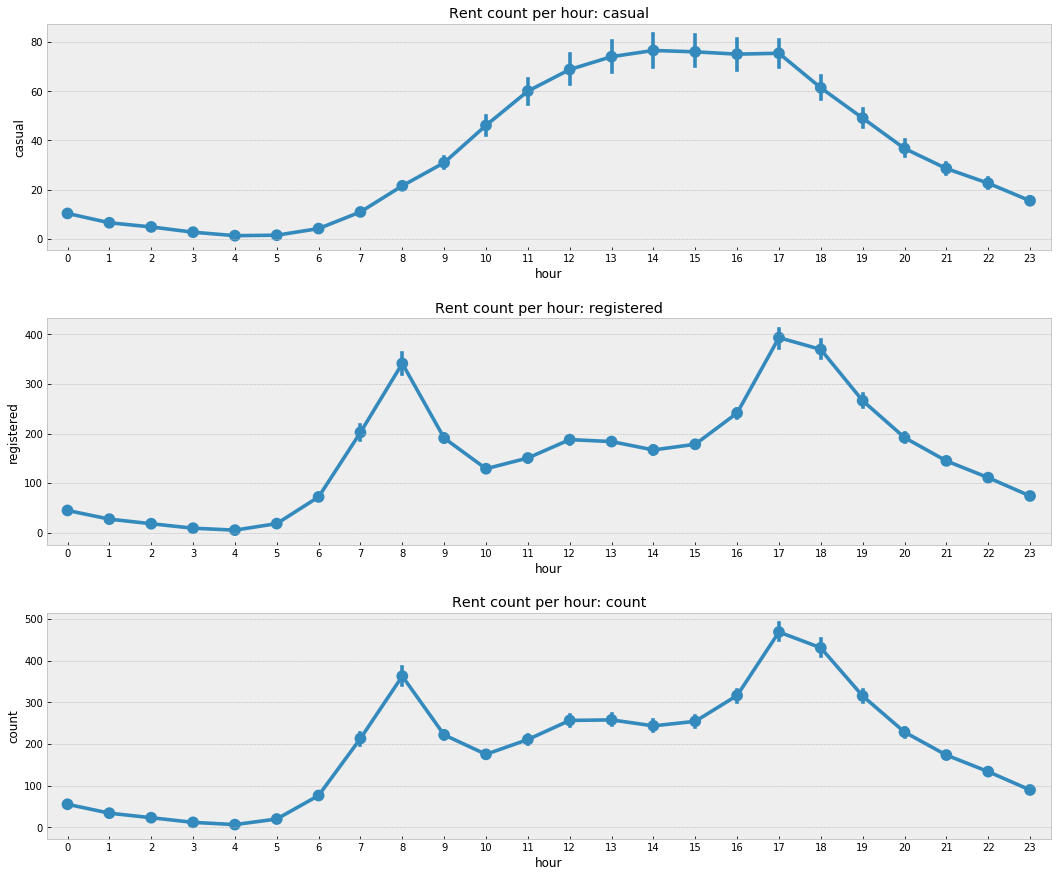

In [20]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (18,15))
plt.subplots_adjust(hspace= 0.3)

cols = ['casual', 'registered', 'count']

for i, col in enumerate(cols) :
    sns.pointplot(x = 'hour', y = col, data = train, ax=ax[i])
    title = 'Rent count per hour: ' + col
    ax[i].set_title(title)

register과 count의 경향이 비슷함!

Text(0.5, 1.0, 'Rent count per hour day by dayofweek')

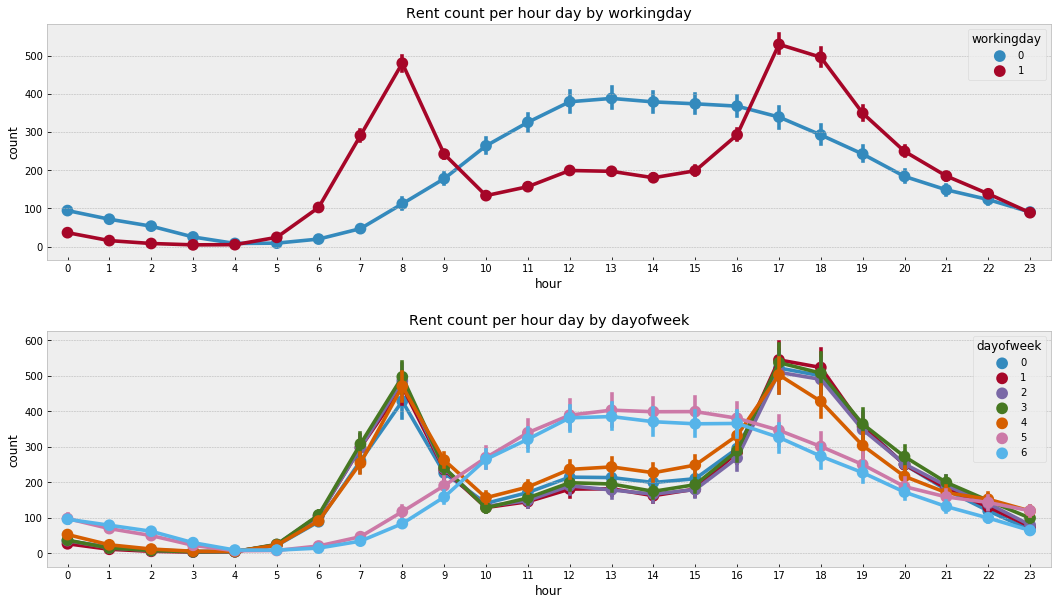

In [21]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (18,10))
plt.subplots_adjust(hspace= 0.3)

sns.pointplot(data = train, x = 'hour', y = 'count', hue='workingday', ax = ax[0])
ax[0].set_title('Rent count per hour day by workingday')
sns.pointplot(data = train, x = 'hour', y = 'count', hue='dayofweek', ax = ax[1])
ax[1].set_title('Rent count per hour day by dayofweek')

- 근무를 하는 날엔(workingday = 1) 회원의 대여량(registered)과 비슷한 형태
- 근무를 안 하는 날엔(workingday = 0) 비회원의 대여량(casual)과 비슷한 형태
- 월~금은 회원의 대여량 / 토,일은 비회원의 대여량과 비슷

- 시간별 대여량은 회원, 비회원간의 차이가 있다. 회원은 근무일과 월~금, 비회원은 근무일이 아닌 날 토,일에 자주 빌린다!

## season, temp, atemp

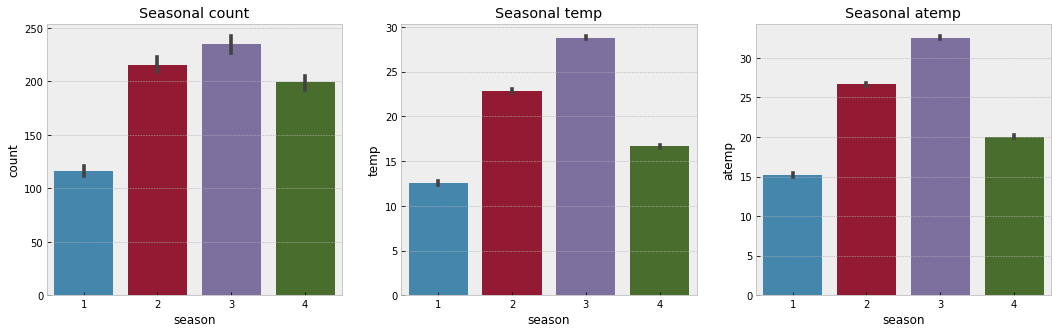

In [22]:
#계절별 평균값
f, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18,5))

cols = ['count','temp', 'atemp']

for i, col in enumerate(cols) :
    sns.barplot(data = train, x = 'season', y = col, ax = ax[i])
    title = 'Seasonal ' + col
    ax[i].set_title(title)

- 일반적으로, 봄에 겨울보다 많이 탈 것 같은데 겨울에 더 많이 탄다!
- 이는 기온과 체감온도와 관계가 있는 것 같다. 겨울이라 범주화되어있는 경우가 평균적으로 기온과 체감온도가 높다!

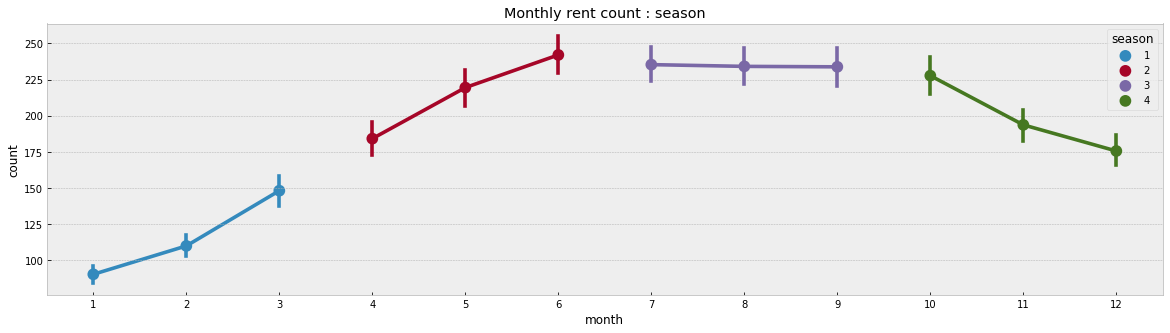

In [23]:
f,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,5))
sns.pointplot(data = train, x = 'month', y = 'count', hue = 'season', ax = ax)
ax.set_title('Monthly rent count : season')
plt.show()

- 봄이 겨울보다 추운게 의아하긴 하지만, 일단 그렇게 범주화되어있고, 온도, 계절이 대여량에 영향을 주는 요소이다.

## holiday

Text(0.5, 1.0, 'Rent count per hour by workingday')

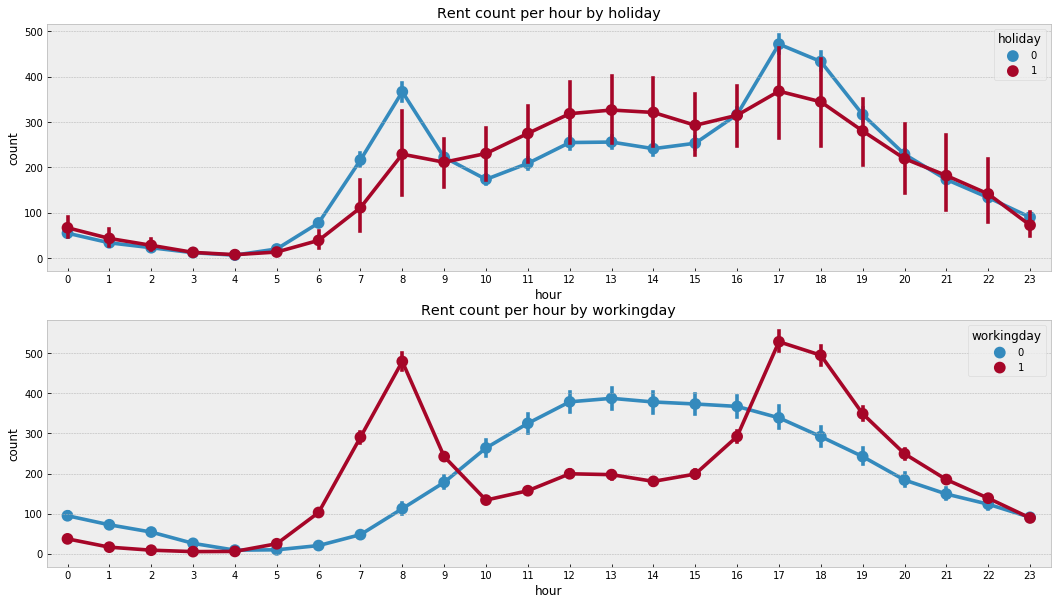

In [24]:
f,ax = plt.subplots(nrows = 2, ncols = 1, figsize = (18,10))

sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'holiday', ax = ax[0])
ax[0].set_title('Rent count per hour by holiday')
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax[1])
ax[1].set_title('Rent count per hour by workingday')

- 공휴일(holiday : 1)과 일하지 않는 날(workingday = 0)일 때 비슷한 경향!

## humidity, windspeed

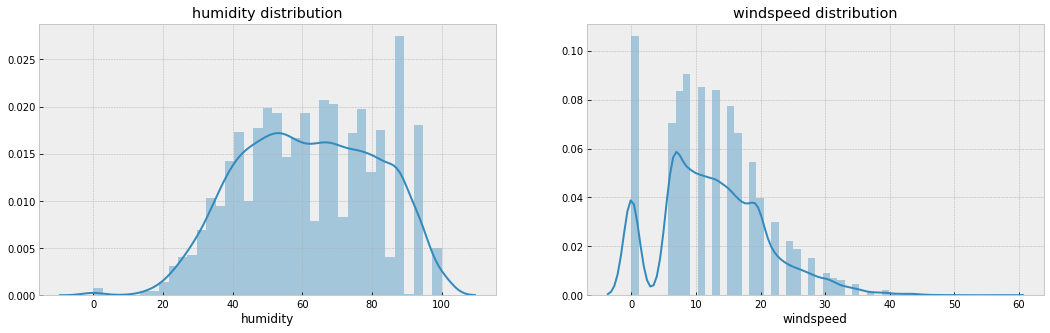

In [25]:
f,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))

sns.distplot(train['humidity'], ax = ax[0])
ax[0].set_title('humidity distribution')
sns.distplot(train['windspeed'], ax = ax[1])
ax[1].set_title('windspeed distribution')

plt.show()

## weather
날씨 (1: 맑음, 2: 안개/구름, 3: 약한 눈/비/천둥, 4: 강한 눈/비/우박

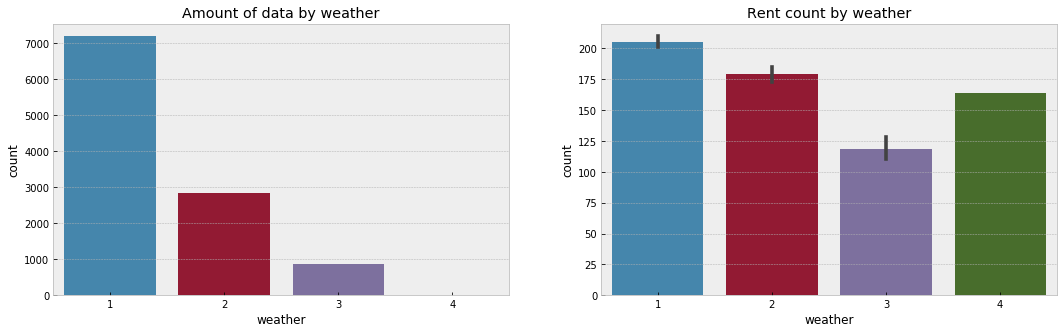

In [26]:
f,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))

sns.countplot(data = train, x = 'weather', ax = ax[0])
ax[0].set_title('Amount of data by weather')

sns.barplot(data = train, x= 'weather', y = 'count', ax = ax[1])
ax[1].set_title('Rent count by weather')

plt.show()

In [27]:
print('weather = 1인 개수 : ', train[train.weather == 1].shape[0])
print('weather = 2인 개수 : ', train[train.weather == 2].shape[0])
print('weather = 3인 개수 : ', train[train.weather == 3].shape[0])
print('weather = 4인 개수 : ', train[train.weather == 4].shape[0])

weather = 1인 개수 :  7192
weather = 2인 개수 :  2834
weather = 3인 개수 :  859
weather = 4인 개수 :  1


- 1쪽으로 갈수록 날씨가 좋다는 의미 -> 날씨가 좋을수록 많이 탄다!
- 4는 데이터 개수가 1개라서 큰 의밍 없어보인다

# 데이터 전처리

## get_dummies

In [28]:
cols = ['season', 'weather', 'dayofweek']

In [29]:
for col in cols :
    aa = pd.get_dummies(train[col], prefix = col)
    train = pd.concat([train, aa], axis = 1)
    train.drop(col, axis = 1, inplace = True)
    
    aa = pd.get_dummies(test[col], prefix = col)
    test = pd.concat([test, aa], axis = 1)
    test.drop(col, axis = 1, inplace = True)

In [30]:
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,casual_log,registered_log,count_log,year,month,day,hour,minute,second,year-month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1.609438,2.708050,2.890372,2011,1,1,0,0,0,2011-1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,2.302585,3.526361,3.737670,2011,1,1,1,0,0,2011-1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1.945910,3.367296,3.526361,2011,1,1,2,0,0,2011-1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1.609438,2.484907,2.708050,2011,1,1,3,0,0,2011-1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,0.693147,1.098612,1.098612,2011,1,1,4,0,0,2011-1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# training

In [31]:
features = ["holiday", "workingday", "temp", "atemp", "humidity", "windspeed", 'year','hour','month','season_1', 'season_2', 'season_3', 'season_4',
            'weather_1', 'weather_2', 'weather_3', 'weather_4', 'dayofweek_0','dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4','dayofweek_5', 'dayofweek_6']

features

['holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'month',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'dayofweek_0',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6']

- y_train_c : 학습할 casual 회원
- y_train_r : 학습할 registered 회원

In [32]:
X_train = train[features]
X_test = test[features]
y_train_c = train['casual_log']
y_train_r = train['registered_log']

# Modeling

In [33]:
from sklearn.metrics import make_scorer, mean_squared_error

def rmse(predict, actual) :
    return np.sqrt(mean_squared_error(actual, predict))

rmse_score = make_scorer(rmse)

## casual_log
### baseline randomforest

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1, random_state = 10)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(random_state = 10, n_splits=3)
score = cross_val_score(rf, X_train, y_train_c, cv = kfold, scoring = rmse_score).mean()

print('baseline randomforest 3-fold average rmse : ', score)

baseline randomforest 3-fold average rmse :  0.54338165255104


### Bayesian Optimization

In [35]:
from bayes_opt import BayesianOptimization

In [36]:
def rf_cv(max_depth, max_features, n_estimators) :
    model = RandomForestRegressor(n_jobs = -1, random_state = 10,
                                  max_depth=int(max_depth), max_features = max_features, n_estimators = int(n_estimators))
    
    rmse = cross_val_score(model, X_train, y_train_c, cv = kfold, scoring = rmse_score).mean()
    return -rmse

In [37]:
pbounds = {'max_depth' : (2,100),
          'max_features' : (0.1,1),
          'n_estimators' : (10,500)}

optimizer = BayesianOptimization(
        f = rf_cv,
        pbounds = pbounds,
        verbose = 2,
        random_state = 10
)

optimizer.maximize(init_points = 3)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        | -0.6255   |  77.59    |  0.1187   |  320.5    |
|  2        | -0.5106   |  75.38    |  0.5487   |  120.2    |
|  3        | -0.5139   |  21.41    |  0.7845   |  92.86    |
|  4        | -0.6602   |  100.0    |  0.1      |  10.0     |
|  5        | -0.869    |  2.0      |  1.0      |  500.0    |
|  6        | -1.116    |  2.0      |  0.1      |  221.6    |
|  7        | -0.626    |  100.0    |  0.1      |  500.0    |
|  8        | -0.8734   |  2.0      |  1.0      |  10.0     |
|  9        | -0.5218   |  100.0    |  1.0      |  407.0    |
|  10       | -0.5226   |  100.0    |  1.0      |  233.1    |
|  11       | -0.5222   |  100.0    |  1.0      |  78.73    |
|  12       | -0.5219   |  100.0    |  1.0      |  329.0    |
|  13       | -0.6248   |  100.0    |  0.1      |  162.6    |
|  14       | -0.6327   |  57.12    |  0.1      |  67.04    |
|  15   

In [38]:
optimizer.set_bounds(new_bounds = {'max_depth' : (50,200),
                                    'max_features' : (0.5,1),
                                    'n_estimators' : (90,500)})

optimizer.maximize(init_points = 3)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  29       | -0.5157   |  63.25    |  0.8427   |  480.9    |
|  30       | -0.514    |  50.59    |  0.7561   |  423.2    |
|  31       | -0.5166   |  141.9    |  0.8609   |  209.7    |
|  32       | -0.5217   |  200.0    |  1.0      |  415.6    |
|  33       | -0.5224   |  200.0    |  1.0      |  90.0     |
|  34       | -0.5217   |  200.0    |  1.0      |  295.3    |
|  35       | -0.5211   |  200.0    |  1.0      |  500.0    |
|  36       | -0.5225   |  200.0    |  1.0      |  178.6    |
|  37       | -0.5215   |  159.4    |  1.0      |  448.3    |
|  38       | -0.5216   |  176.8    |  1.0      |  353.4    |
|  39       | -0.5224   |  200.0    |  1.0      |  235.6    |
|  40       | -0.5228   |  156.5    |  1.0      |  116.5    |
|  41       | -0.5216   |  155.8    |  1.0      |  293.5    |
|  42       | -0.5217   |  150.1    |  1.0      |  404.1    |
|  43   

In [39]:
casual_params = optimizer.max['params']
casual_params

{'max_depth': 75.38278048878396,
 'max_features': 0.5486563110723314,
 'n_estimators': 120.15035631011536}

In [40]:
casual_model = RandomForestRegressor(n_jobs = -1, random_state=10,
                                    max_depth = int(casual_params['max_depth']),
                                    max_features = casual_params['max_features'],
                                    n_estimators = int(casual_params['n_estimators']))

casual_model.fit(X_train, y_train_c)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=75,
           max_features=0.5486563110723314, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [41]:
casual_pred = np.expm1(casual_model.predict(X_test))

## registered_log
### baseline randomforest model

In [42]:
rf = RandomForestRegressor(n_jobs = -1, random_state = 10)

kfold = KFold(random_state = 10, n_splits=3)
score = cross_val_score(rf, X_train, y_train_r, cv = kfold, scoring = rmse_score).mean()

print('baseline randomforest 3-fold average rmse : ', score)

baseline randomforest 3-fold average rmse :  0.528558441623661


### bayesian optimization

In [43]:
def rf_cv(max_depth, max_features, n_estimators) :
    model = RandomForestRegressor(n_jobs = -1, random_state = 10,
                                  max_depth=int(max_depth), max_features = max_features, n_estimators = int(n_estimators))
    
    rmse = cross_val_score(model, X_train, y_train_r, cv = kfold, scoring = rmse_score).mean()
    return -rmse

In [44]:
pbounds = {'max_depth' : (2,100),
          'max_features' : (0.1,1),
          'n_estimators' : (10,500)}

optimizer = BayesianOptimization(
        f = rf_cv,
        pbounds = pbounds,
        verbose = 2,
        random_state = 10
)

optimizer.maximize(init_points = 3)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  1        | -0.7218   |  77.59    |  0.1187   |  320.5    |
|  2        | -0.4885   |  75.38    |  0.5487   |  120.2    |
|  3        | -0.4958   |  21.41    |  0.7845   |  92.86    |
|  4        | -0.7687   |  100.0    |  0.1      |  10.0     |
|  5        | -0.9231   |  2.0      |  1.0      |  500.0    |
|  6        | -0.9236   |  2.0      |  1.0      |  219.3    |
|  7        | -0.7223   |  100.0    |  0.1      |  500.0    |
|  8        | -1.213    |  2.0      |  0.1      |  10.0     |
|  9        | -1.212    |  2.0      |  0.1      |  384.0    |
|  10       | -0.5158   |  100.0    |  1.0      |  221.5    |
|  11       | -0.5159   |  100.0    |  1.0      |  405.2    |
|  12       | -1.209    |  2.0      |  0.1      |  133.9    |
|  13       | -0.5173   |  100.0    |  1.0      |  73.53    |
|  14       | -0.7355   |  55.22    |  0.1      |  61.41    |
|  15   

In [45]:
optimizer.set_bounds(new_bounds = {'max_depth' : (50,100),
                                    'max_features' : (0.5,1),
                                    'n_estimators' : (90,500)})

optimizer.maximize(init_points = 3)

|   iter    |  target   | max_depth | max_fe... | n_esti... |
-------------------------------------------------------------
|  29       | -0.5035   |  54.42    |  0.8427   |  480.9    |
|  30       | -0.4965   |  50.2     |  0.7561   |  423.2    |
|  31       | -0.5054   |  80.63    |  0.8609   |  209.7    |
|  32       | -0.5158   |  69.44    |  1.0      |  151.5    |
|  33       | -0.4928   |  100.0    |  0.5      |  189.8    |
|  34       | -0.4894   |  84.44    |  0.5      |  252.9    |
|  35       | -0.4884   |  74.7     |  0.5      |  416.1    |
|  36       | -0.4915   |  50.0     |  0.5      |  220.5    |
|  37       | -0.4891   |  100.0    |  0.5      |  381.3    |
|  38       | -0.5163   |  73.86    |  1.0      |  90.64    |
|  39       | -0.4928   |  83.24    |  0.5      |  174.8    |
|  40       | -0.5155   |  100.0    |  1.0      |  314.9    |
|  41       | -0.5155   |  100.0    |  1.0      |  249.6    |
|  42       | -0.5157   |  69.38    |  1.0      |  233.2    |
|  43   

In [46]:
registered_params = optimizer.max['params']
registered_params

{'max_depth': 50.31888392986261,
 'max_features': 0.5184606399589695,
 'n_estimators': 440.50312545210414}

In [47]:
registered_model = RandomForestRegressor(n_jobs = -1, random_state=10,
                                    max_depth = int(registered_params['max_depth']),
                                    max_features = registered_params['max_features'],
                                    n_estimators = int(registered_params['n_estimators']))

registered_model.fit(X_train, y_train_c)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features=0.5184606399589695, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=440, n_jobs=-1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [48]:
registered_pred = np.expm1(registered_model.predict(X_test))

# Submit
## count = casual + registered

In [49]:
count = registered_pred + casual_pred

submission = pd.read_csv('../input/sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [50]:
submission['count'] = count
submission.to_csv("1st.csv", index=False)